In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import datetime

plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 18})
current_palette = sns.color_palette()


In [2]:
#column_names = ['timeA','VA']
#dataA = pd.read_csv('A/CH3.CSV', skiprows=1, names=column_names)
#column_names = ['timeAgen','VAgen']
#dataAgen = pd.read_csv('A/CH1.CSV', skiprows=1, names=column_names)


FULLDATA = pd.DataFrame({'A' : []})

frames = []
voltages = [2,5,10,15,20,25,30]
channels = [1,2,3,5]
for i in voltages:
    for j in channels:
        location = 'VoltageRisetimeTests/'+str(i)+'V/CH'+str(j)+'.CSV'
        timelabel = 'time_'+str(i)+"V_CH"+str(j)
        vlabel = 'V_'+str(i)+"V_CH"+str(j)
        ColumnNames = [timelabel,vlabel]
        dataA = pd.read_csv(location,skiprows=1,names=ColumnNames)
        frames = [FULLDATA,dataA]
        FULLDATA=pd.concat(frames,axis=1)
        
        
FULLDATA =FULLDATA.drop('A',1)

cnnames = FULLDATA.columns.get_values()
for k in cnnames:
    if k.startswith('time') == True:
        #print(k)
        FULLDATA[k] = FULLDATA[k] * 1E6
        #FULLDATA[k] = FULLDATA[k] - 0.1

FULLDATA


,time_2V_CH1,V_2V_CH1,time_2V_CH2,V_2V_CH2,time_2V_CH3,V_2V_CH3,time_2V_CH5,V_2V_CH5,time_5V_CH1,V_5V_CH1,...,time_25V_CH5,V_25V_CH5,time_30V_CH1,V_30V_CH1,time_30V_CH2,V_30V_CH2,time_30V_CH3,V_30V_CH3,time_30V_CH5,V_30V_CH5
0,-3.2000,0.095700,-3.2000,-1.978,-3.2000,-1.978,-1.2000,-2.002,-3.2000,0.037110,...,-1.2000,-25.15,-3.2000,0.037110,-3.2000,-30.62,-3.2000,-30.42,-1.2000,-30.22
1,-3.1992,0.115200,-3.1992,-1.978,-3.1992,-1.880,-1.1996,-2.197,-3.1992,0.056640,...,-1.1996,-25.24,-3.1992,0.056640,-3.1992,-30.62,-3.1992,-30.32,-1.1996,-30.71
2,-3.1984,0.056640,-3.1984,-2.075,-3.1984,-1.880,-1.1992,-1.807,-3.1984,0.056640,...,-1.1992,-25.05,-3.1984,0.017580,-3.1984,-30.81,-3.1984,-30.13,-1.1992,-30.32
3,-3.1976,0.056640,-3.1976,-1.978,-3.1976,-2.026,-1.1988,-1.709,-3.1976,0.056640,...,-1.1988,-25.24,-3.1976,0.037110,-3.1976,-30.91,-3.1976,-30.42,-1.1988,-30.32
4,-3.1968,0.076170,-3.1968,-2.124,-3.1968,-1.978,-1.1984,-2.100,-3.1968,0.076170,...,-1.1984,-25.44,-3.1968,0.056640,-3.1968,-30.62,-3.1968,-30.52,-1.1984,-30.42
5,-3.1960,0.037110,-3.1960,-2.026,-3.1960,-2.026,-1.1980,-1.904,-3.1960,0.076170,...,-1.1980,-25.44,-3.1960,0.017580,-3.1960,-30.91,-3.1960,-30.71,-1.1980,-30.42
6,-3.1952,0.037110,-3.1952,-2.222,-3.1952,-2.026,-1.1976,-2.002,-3.1952,0.017580,...,-1.1976,-25.54,-3.1952,0.076170,-3.1952,-30.22,-3.1952,-30.22,-1.1976,-30.42
7,-3.1944,-0.021480,-3.1944,-1.929,-3.1944,-1.929,-1.1972,-1.709,-3.1944,0.037110,...,-1.1972,-25.44,-3.1944,0.056640,-3.1944,-30.71,-3.1944,-30.62,-1.1972,-30.42
8,-3.1936,-0.041020,-3.1936,-2.124,-3.1936,-1.831,-1.1968,-1.904,-3.1936,0.037110,...,-1.1968,-25.34,-3.1936,0.095700,-3.1936,-30.71,-3.1936,-30.42,-1.1968,-30.22
9,-3.1928,0.037110,-3.1928,-2.124,-3.1928,-2.026,-1.1964,-2.002,-3.1928,0.056640,...,-1.1964,-25.44,-3.1928,0.037110,-3.1928,-30.81,-3.1928,-30.52,-1.1964,-30.42


In [3]:
now = datetime.datetime.now()
datetimeforplots=now.strftime("%Y%m%d_%H%M")
#print(datetimeforplots)

def plotrisetime(HVS): ### HVS=[0,1,2,3]
    if HVS == 0: 
        channel = 2
        label = '-1'
    if HVS == 1: 
        channel = 3
        label = '+1'
    if HVS ==3:
        channel = 5
        label = '+2'
    if HVS == 2: 
        return "No Data Yet!"
    
    voltages = [2,5,10,15,20,25,30]
    for i in voltages:
        for j in channels:
            timelabel = 'time_'+str(i)+"V_CH"+str(j)
            vlabel = 'V_'+str(i)+"V_CH"+str(j)
            vlabelshort = str(i)+'V'
            Title = 'Risetime vs. Voltage, HVS' + label

            if i==2 and j==1:
                ax=FULLDATA.plot(timelabel,vlabel,title=Title,label='Square Wave')
            elif j==channel:
                FULLDATA.plot(timelabel,vlabel,label=vlabelshort,ax=ax)
            else:
                continue
    plt.xlim([-.2,1])
    plt.xlabel("time (usec)")
    plt.ylabel('V')
    #plt.savefig('CompareRisetimes_HVS'+str(HVS)+'_'+datetimeforplots+'.pdf')
    return plt.show()



def func(x, a, c,d):
    #return a*np.exp(-x**2/c +b)+d
    #return a*np.log(x*c+b)+d
    return (a*(1-np.exp(d - (x/c))))


def plotrisetimesingle(HVS): ### HVS=[0,1,2,3]
    if HVS == 0: 
        channel = 2
        label = '-1'
    if HVS == 1: 
        channel = 3
        label = '+1'
    if HVS ==3:
        channel = 5
        label = '+2'
    if HVS == 2: 
        return "No Data Yet!"
    tau = np.empty((0,2), float)
    print (tau)

    voltages = [2,5,10,15,20,25,30]
    for voltage in voltages:
        j = channel
        timelabel = 'time_'+str(i)+"V_CH"+str(j)
        vlabel = 'V_'+str(i)+"V_CH"+str(j)
        vlabelshort = str(i)+'V'
        Title = 'Risetime vs. Voltage, HVS' + label + ', V=' + str(voltage)

        #FitData = FULLDATA[(FULLDATA[timelabel]>= 0.0) & (FULLDATA[timelabel]<=1)]
        FitData = FULLDATA[(FULLDATA[vlabel]>=-1*voltage+1) & (FULLDATA[vlabel]<=voltage+1)]


        #np.polyfit(np.log(FULLDATA[timelabel]), FULLDATA[vlabel], 1)
        popt, pcov = curve_fit(func, FitData[timelabel], FitData[vlabel],bounds=(0, [35, 1.0,5]))
        #print (popt)
        #print (pcov)

        #popt = [30.0, .1 ,2]
        #ax=FitData.plot(timelabel,vlabel,title=Title)#,label= vlabelshort)

        #plt.plot(FULLDATA[timelabel],func(FULLDATA[timelabel],*popt))

        
        
        if voltage ==2:
            stau = [[voltage,popt[1],pcov[1,1]]]
        else:
            stau = np.append(stau, [[voltage,popt[1],pcov[1,1]]], axis=0)
        #print (stau)
        #        tau = np.append(tau, stau, axis=0)
        
        tau =  '%s' % float('%.3g' % popt[1])
        tauerr=  '%s' % float('%.3g' % pcov[1,1])
        #plt.text(.6,-10,'$tau  = $'+str(tau)+' usec '+'($\pm$'+tauerr+' usec)')
        

        
        
        #plt.savefig('CompareRisetimes_HVS'+str(channel)+'_'+datetimeforplots+'.pdf')
    print (stau)
    plt.errorbar(stau[:,0],stau[:,1]*1000,yerr=stau[:,2]*1000,fmt='o')
    #plt.xlim([-.1,2])
    plt.ylim([30,120])
    plt.xlabel("Voltage")
    plt.ylabel('tau (ns)')
    plt.title('Risetimes Vs Voltage, HVS'+label)
    #plt.legend().set_visible(False)
    #print (tau)
    #plt.savefig('RisetimeVsVoltage_HVS'+str(channel)+'_'+datetimeforplots+'.pdf')
    return plt.show()


[]
[[  2.00000000e+00   3.56402852e-02   2.74278212e-03]
 [  5.00000000e+00   3.56233840e-02   2.12532017e-05]
 [  1.00000000e+01   6.77577601e-02   2.09241991e-05]
 [  1.50000000e+01   6.99185415e-02   4.85889117e-06]
 [  2.00000000e+01   7.18280815e-02   1.88584283e-06]
 [  2.50000000e+01   7.27139863e-02   9.30853938e-07]
 [  3.00000000e+01   6.72191918e-02   1.47325046e-08]]


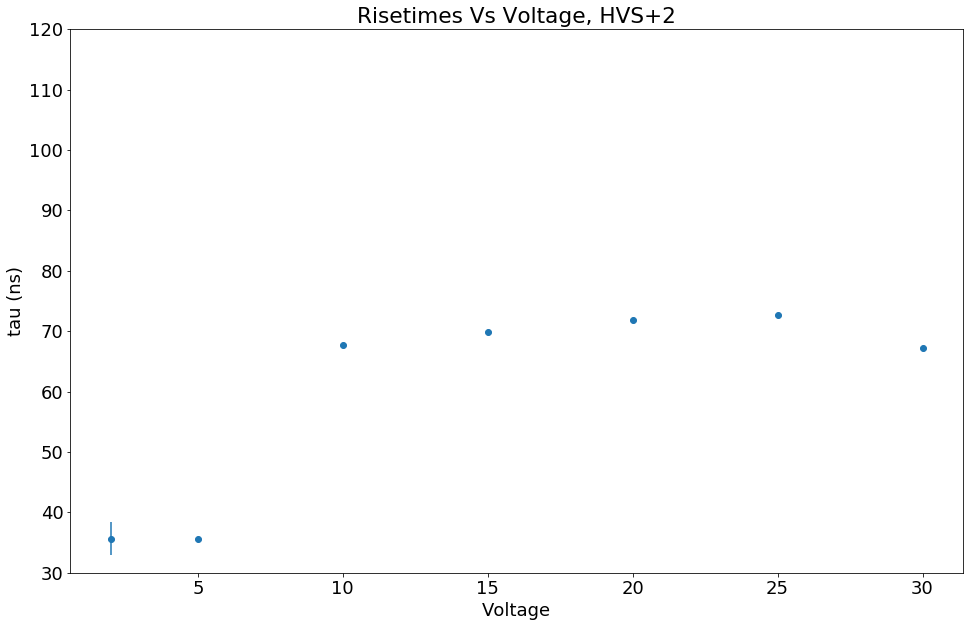

In [19]:
plotrisetimesingle(3)

[]
[[  2.00000000e+00   6.15164200e-02   2.24031673e-01]
 [  5.00000000e+00   6.67070731e-02   1.98958925e-03]
 [  1.00000000e+01   7.44203763e-02   8.35959562e-05]
 [  1.50000000e+01   7.39911581e-02   1.16744872e-05]
 [  2.00000000e+01   7.64353078e-02   4.21028023e-06]
 [  2.50000000e+01   7.15041551e-02   1.40793557e-06]
 [  3.00000000e+01   7.15505256e-02   2.36579058e-08]]


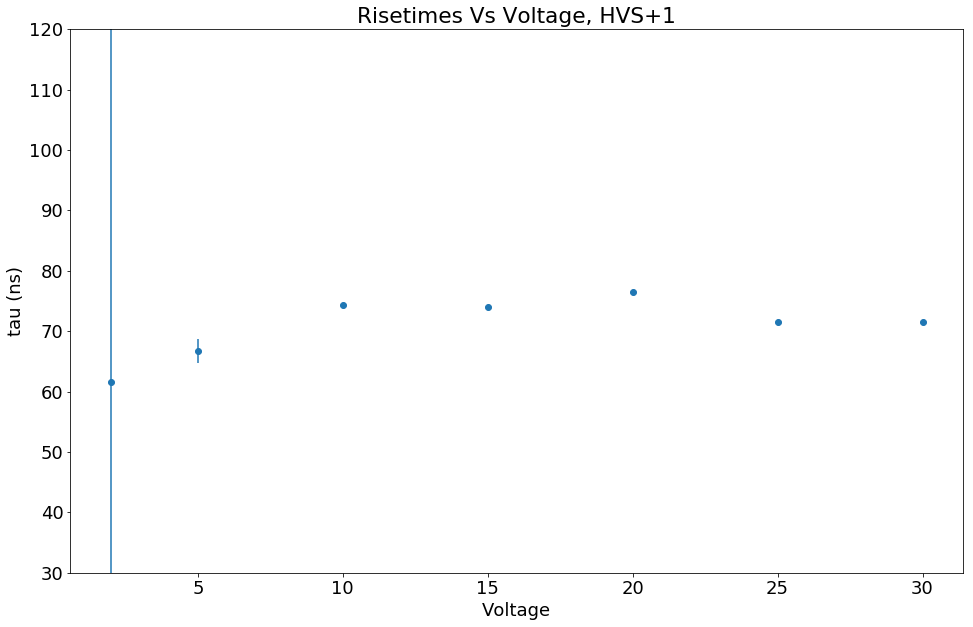

In [20]:
plotrisetimesingle(1)

[]
[[  2.00000000e+00   8.17913226e-02   9.11624927e-02]
 [  5.00000000e+00   9.89778899e-02   1.89213740e-03]
 [  1.00000000e+01   6.93460981e-02   2.77710905e-05]
 [  1.50000000e+01   9.30549300e-02   1.38979920e-05]
 [  2.00000000e+01   8.46392614e-02   2.13625932e-06]
 [  2.50000000e+01   8.53577922e-02   7.86745948e-07]
 [  3.00000000e+01   9.33361164e-02   3.53370303e-08]]


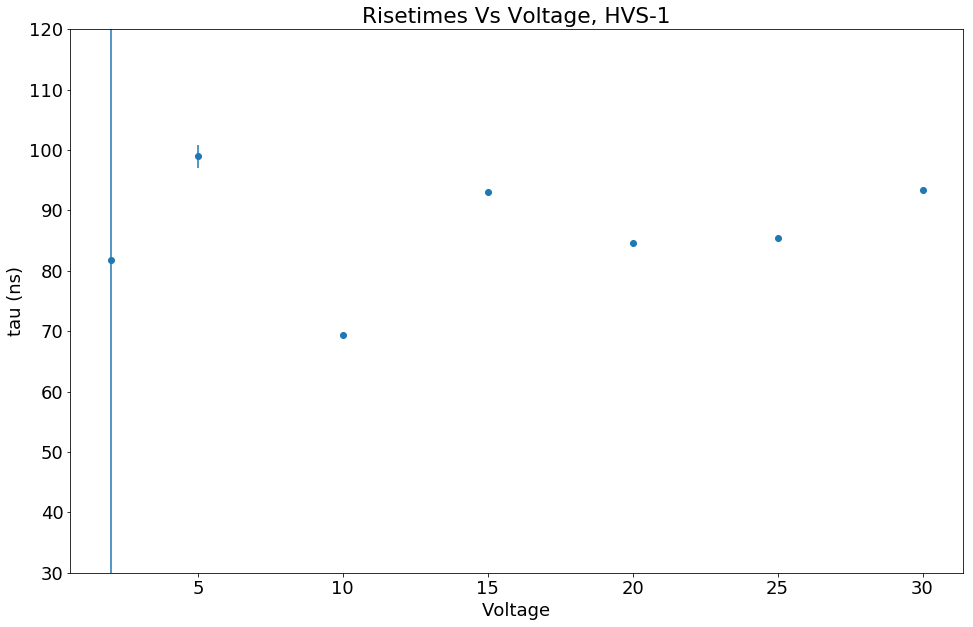

In [21]:
plotrisetimesingle(0)

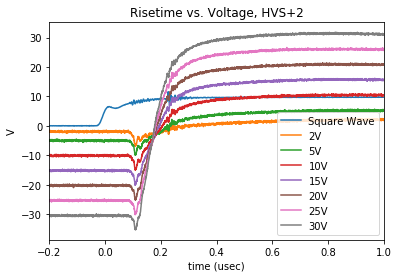

In [4]:
plotrisetime(3)

[]
[]
[]


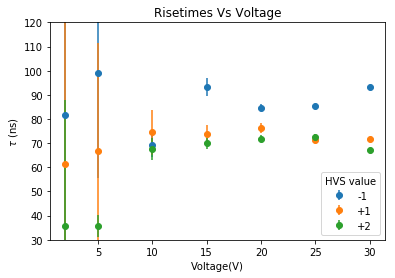

In [5]:
now = datetime.datetime.now()
datetimeforplots=now.strftime("%Y%m%d_%H%M")
#print(datetimeforplots)
for HVS in [0,1,3]:
    if HVS == 0: 
        channel = 2
        labelx = '-1'
    if HVS == 1: 
        channel = 3
        labelx = '+1'
    if HVS ==3:
        channel = 5
        labelx = '+2'
    #if HVS == 2: 
    #    return "No Data Yet!"
    tau = np.empty((0,2), float)
    print (tau)

    voltages = [2,5,10,15,20,25,30]
    for voltage in voltages:
        j = channel
        timelabel = 'time_'+str(i)+"V_CH"+str(j)
        vlabel = 'V_'+str(i)+"V_CH"+str(j)
        vlabelshort = str(i)+'V'
        Title = 'Risetime vs. Voltage, HVS' + labelx + ', V=' + str(voltage)

        #FitData = FULLDATA[(FULLDATA[timelabel]>= 0.0) & (FULLDATA[timelabel]<=1)]
        FitData = FULLDATA[(FULLDATA[vlabel]>=-1*voltage+1) & (FULLDATA[vlabel]<=voltage+1)]


        #np.polyfit(np.log(FULLDATA[timelabel]), FULLDATA[vlabel], 1)
        popt, pcov = curve_fit(func, FitData[timelabel], FitData[vlabel],bounds=(0, [35, 1.0,5]))
        #print (popt)
        #print (pcov)

        #popt = [30.0, .1 ,2]
        #ax=FitData.plot(timelabel,vlabel,title=Title)#,label= vlabelshort)

        #plt.plot(FULLDATA[timelabel],func(FULLDATA[timelabel],*popt))

        perr = np.sqrt(pcov[1,1])
        #print (perr)
        if voltage ==2:
            stau = [[voltage,popt[1],perr]]
        else:
            stau = np.append(stau, [[voltage,popt[1],perr]], axis=0)
        #print (stau)
        #        tau = np.append(tau, stau, axis=0)
        
        tau =  '%s' % float('%.3g' % popt[1])
        tauerr=  '%s' % float('%.3g' % pcov[1,1])
        #plt.text(.6,-10,'$tau  = $'+str(tau)+' usec '+'($\pm$'+tauerr+' usec)')
        

        
        
        #plt.savefig('CompareRisetimes_HVS'+str(channel)+'_'+datetimeforplots+'.pdf')
    #print (stau)
    plt.errorbar(stau[:,0],stau[:,1]*1000,yerr=stau[:,2]*1000,fmt='o',label=labelx)
    #plt.xlim([-.1,2])
    plt.ylim([30,120])
    plt.xlabel("Voltage(V)")
    plt.ylabel(r'$\tau$ (ns)')
    plt.title('Risetimes Vs Voltage')
    plt.legend(title='HVS value')#.set_visible(False)
    #print (tau)
    #plt.savefig('RisetimeVsVoltage_all'+'_'+datetimeforplots+'.pdf')
#return plt.show()